In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
df_part7 = pd.read_csv('data/전처리/전처리part7_final.csv', encoding='CP949')

In [9]:
# df_part7.drop(columns='Unnamed: 0', inplace=True)
df_part7

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,(주)CMG제약,58820.0,201112.0,200108.0,NaN,0.0,0.0,0.0,제조업,1.0,13.166482,80.280163,5.219839,56.396905,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,66.046945,200.97,165.03,15.10,602.31,51.41,3.53,-46.08,-172.40,-15.65,-24.07,35.590076,12.72,35.86,1.285100e+02,19.56,89.819047,27.179630,71.503704,19.715837,204.066667,0.66,0.984333,2.01,1.25,1.55,6.42,2.45,0.86
1,(주)CMG제약,58820.0,201212.0,200108.0,NaN,0.0,0.0,0.0,제조업,1.0,109.147119,-341.571868,75.170505,-8.429134,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,55.317408,693.49,649.98,68.81,323.41,80.77,-7.75,-8.10,-11.83,-3.62,-12.71,7.330001,0.47,2.89,1.067000e+01,1.66,1749.845902,-0.657015,69.134328,18.562172,425.291045,0.39,0.655130,0.93,0.52,0.57,5.71,1.85,0.42
2,(주)CMG제약,58820.0,201312.0,200108.0,NaN,0.0,0.0,0.0,제조업,1.0,-2.093352,2348.675303,55.100407,25.510008,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,87.631971,694.71,610.74,394.63,282.72,14.11,0.70,-39.85,-194.73,-4.93,-13.51,14.120364,12.51,77.91,2.894000e+02,34.29,71.284323,51.118235,79.448529,17.604882,411.485294,0.36,0.506332,1.26,0.48,0.52,5.39,2.07,0.42
3,(주)CMG제약,58820.0,201412.0,200108.0,NaN,0.0,0.0,0.0,제조업,1.0,3.855597,-46.641074,0.010946,11.520576,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,84.387905,324.58,268.23,101.24,285.31,18.50,3.60,-17.73,-104.12,-2.77,-7.06,25.090228,12.16,37.80,1.320600e+02,31.04,76.809811,43.079512,114.841463,30.445768,354.432927,0.40,0.464339,2.85,0.68,0.80,4.77,1.86,0.56
4,(주)CMG제약,58820.0,201512.0,200108.0,NaN,0.0,0.0,0.0,제조업,1.0,-2.644307,-2409.614083,-4.480893,18.851969,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,82.795953,296.85,235.21,29.00,254.69,20.78,-32.22,16.12,24988.82,2.77,5.80,31.315211,7.63,24.21,9.092000e+01,15.96,134.474407,27.671795,114.243590,28.007199,362.769231,0.47,0.564493,2.88,0.99,1.22,5.22,2.10,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16629,흥아해운(주),3280.0,201612.0,197606.0,NaN,0.0,0.0,0.0,운수 및 창고업,0.0,21.081715,-263.287062,11.215038,-1.581947,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,20.081457,39.46,32.52,5.46,68.73,397.97,0.21,2.12,6.30,1.70,1.96,-11.471676,10.98,15.81,3.509713e+09,12.66,66.490562,86.464501,709.037155,0.000000,1000.623142,0.95,4.964267,1.20,6.98,7.96,56.47,25.24,2.19
16630,흥아해운(주),3280.0,201712.0,197606.0,NaN,1.0,0.0,1.0,운수 및 창고업,0.0,-11.431409,-327.993526,-39.276758,0.562842,-2.23,-322.165979,-1.57,-8.79,-8.13,-1.45,-8.47,-47.52,3.67,106.15,27.74,6549.252463,-575.510430,-53.965366,842.628688,87.23,13.767987,35.76,29.58,6.17,65.00,626.32,-0.42,-0.57,-1.53,-0.49,-0.50,-9.612150,5.43,8.35,1.535742e+09,5.51,131.187104,44.778480,605.404995,0.000000,905.653637,0.93,4.550483,1.12,7.68,9.30,44.09,23.08,2.09
16631,흥아해운(주),3280.0,201812.0,197606.0,NaN,1.0,0.0,1.0,운수 및 창고업,0.0,-5.331246,-17.741050,-37.418411,-9.870781,-13.57,-187.022263,-4.99,-11.48,-10.47,-4.55,-39.57,-91.08,4.27,111.11,-82.30,4292.022588,-492.703

## -------------------------------------------------------

## 피처와 클래스

In [32]:
df_part7.drop(df_part7[df_part7['회사명'].isna()].index, inplace=True)
df_part7.reset_index(drop=True, inplace=True)

In [36]:
df_part7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16563 entries, 0 to 16562
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                16563 non-null  object 
 1   거래소코드              16563 non-null  float64
 2   회계년도               16563 non-null  float64
 3   상장일                16563 non-null  float64
 4   상장폐지일_x            742 non-null    object 
 5   부실기업1              16563 non-null  int32  
 6   부실기업2              16563 non-null  int32  
 7   부실기업               16563 non-null  int32  
 8   업종                 16563 non-null  object 
 9   경기민감도              16563 non-null  float64
 10  총자본증가율             16563 non-null  float64
 11  순이익증가율             16563 non-null  float64
 12  자기자본증가율            16563 non-null  float64
 13  매출액증가율             16563 non-null  float64
 14  종업원수증가율            16563 non-null  float64
 15  정상영업손익증가율          16563 non-null  float64
 16  매출액정상영업이익률         165

In [33]:
df_sorted = df_part7.sort_values('회계년도', ascending=True)
df_sorted.reset_index(drop=True, inplace=True)

In [35]:
df_part7[['부실기업1', '부실기업2', '부실기업']] = df_part7[['부실기업1', '부실기업2', '부실기업']].astype(int)

In [37]:
df_sorted[df_sorted['회계년도']==201912]

,회사명,거래소코드,회계년도,상장일,상장폐지일_x,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
12883,(주)율호,72770.0,201912.0,200707.0,NaN,0.0,0.0,0.0,정보통신업,0.0,48.779559,64.246372,2.751542,15.121988,-12.07,223.226837,2.49,-1.39,-1.39,2.48,6.16,-9.79,0.04,97.01,-130.65,1772.645320,-24.692249,7.186314,603.879278,27.26,40.321867,164.32,111.78,14.51,111.90,148.00,6.87,0.68,2.63,0.40,0.41,81.681243,9.24,614.32,922.04,9.28,55.643888,70.989804,3.450980,0.000000,913.352941,1.00,2.362396,1.67,1.21,1.78,3.79,3.27,0.75
12884,(주)이노와이어리스,73490.0,201912.0,200502.0,NaN,1.0,0.0,1.0,제조업,1.0,23.987564,5938.227121,20.566282,51.243520,13.33,6045.911265,15.84,13.57,12.03,14.04,20.74,17.76,1.03,84.98,74.83,16134.527450,2190.209080,3723.004248,12029.820910,2595.71,66.869854,273.47,250.02,156.23,378.87,49.54,12.38,30.13,72.14,9.98,12.47,13.520679,43.35,149.54,12670.15,54.16,60.719524,106.792145,93.823529,0.731388,345.214533,0.89,0.961388,2.75,1.62,1.82,15.44,6.22,1.19
12885,한화시스템(주),272210.0,201912.0,201911.0,NaN,0.0,0.0,0.0,제조업,1.0,26.699780,76.750797,17.963608,36.943065,0.00,91.513115,5.55,4.72,3.38,3.98,9.59,8.15,-0.09,94.72,7.74,14025.024260,661.306838,3706.968357,8785.453891,75.71,40.196857,130.28,106.23,48.20,139.57,148.78,17.29,18.10,147.07,10.83,16.87,79.415790,22.00,261.40,647.53,34.28,66.894387,146.649424,59.997784,22.670240,666.662604,0.72,1.561975,1.23,1.19,1.60,4.69,8.26,0.67
12886,(주)이글벳,44960.0,201912.0,200011.0,NaN,0.0,0.0,0.0,도매 및 소매업,1.0,-0.359970,18.269437,2.856371,13.749877,-9.60,69.809328,5.56,3.58,2.68,4.16,5.46,3.52,0.40,96.38,30.86,2722.907893,97.474957,211.818761,2810.736344,495.32,77.338582,324.89,170.85,25.35,591.19,29.30,7.97,21.48,32.29,4.87,6.50,-154.039650,19.08,42.83,648.51,25.46,59.548372,77.560089,202.690266,11.959717,406.592920,0.75,0.910686,3.13,1.68,3.52,3.22,5.63,1.24
12887,코오롱글로벌(주),3070.0,201912.0,197809.0,NaN,1.0,0.0,1.0,건설업,1.0,8.456511,132.431583,1.853696,3.748750,3.43,63.555746,3.60,0.96,1.58,5.92,27.85,8.04,1.01,98.54,46.76,136508.758400,1316.018604,5806.939213,18613.858640,256.68,20.632073,77.30,63.93,7.74,65.73,384.68,2.79,4.49,9.61,3.56,2.26,-58.916701,17.33,104.15,5639.76,10.97,63.393054,124.435007,118.351527,1.796296,680.590968,1.64,7.363270,2.09,3.59,4.25,22.96,14.96,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727,(주)텔레필드,91440.0,201912.0,200802.0,NaN,0.0,1.0,1.0,제조업,1.0,17.755205,361.700490,21.813765,87.055208,-2.61,291.052969,10.06,8.65,9.08,10.57,22.96,19.28,1.87,93.03,32.37,6215.083312,537.362839,-34.088315,2705.713184,512.72,46.749134,145.10,72.39,16.46,252.90,113.91,4.92,-7.91,-14.03,-4.21,-4.34,161.231120,28.10,494.01,4244.58,28.93,55.526045,106.910089,28.116071,0.000000,435.821429,1.05,1.261614,1.95,1.45,2.97,2.84,4.50,0.93
14728,(주)삼양패키징,272550.0,201912.0,201711.0,NaN,0.0,0.0,0.0,제조업,1.0,3.277444,32.532414,7.832194,2.498115,7.69,18.771339,11.08,7.56,5.12,7.49,15.08,10.29,2.10,90.52,9.77,26421.340930,1997.593774,4348.628806,20142.431240,302.85,50.761052,147.56,121.77,45.72,370.81,97.00,5.16,18.79,23.84,9.25,13.89,-25.794577,19.73,42.83,98.53,29.63,34.425260,233.732878,564.462185,237.402269,1184.575630,0.68,1.361157,1.35,3.58,4.41,18.91,6.62,2.11
14729,한미약품(주),128940.0,201912.0,201007.0,NaN,0.0,0.0,0.0,제조업,1.0,13.156062,86.985998,4.181778,9.615272,0.84,24.295083,9.33,5.73,3.54,5.76,12.89,7.30,1.84,92.67,3.81,95903.559920,5500.020323,1071.858662,46971.956350,2479.98,42.966961,140.36,71.11,22.49,49

In [ ]:
# df_pr[df_pr['회계년도'].isin([201112, 201212, 201312, 201412, 201512, 201612, 201712, 201812])]

In [42]:
len(df_part7.columns)

59

In [43]:
df_part7.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일_x', '부실기업1', '부실기업2', '부실기업',
       '업종', '경기민감도', '총자본증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',
       '정상영업손익증가율', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액',
       '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율', '자기자본구성비율', '유동비율', '당좌비율',
       '현금비율', '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '재고자산대순운전자본비율', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',
       '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본회전률',
       '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률',
       '순운전자본회전률'],
      dtype='object')

In [51]:
data = df_part7.iloc[:, 10:]
target = df_part7.iloc[:, 7]

In [53]:
data

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,13.166482,80.280163,5.219839,56.396905,4.65,1263.950784,3.61,-8.50,-5.58,2.37,3.51,-8.28,0.80,108.35,-245.87,406.280703,-34.519834,-58.600377,418.623493,-17.45,66.046945,200.97,165.03,15.10,602.31,51.41,3.53,-46.08,-172.40,-15.65,-24.07,35.590076,12.72,35.86,1.285100e+02,19.56,89.819047,27.179630,71.503704,19.715837,204.066667,0.66,0.984333,2.01,1.25,1.55,6.42,2.45,0.86
1,109.147119,-341.571868,75.170505,-8.429134,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,55.317408,693.49,649.98,68.81,323.41,80.77,-7.75,-8.10,-11.83,-3.62,-12.71,7.330001,0.47,2.89,1.067000e+01,1.66,1749.845902,-0.657015,69.134328,18.562172,425.291045,0.39,0.655130,0.93,0.52,0.57,5.71,1.85,0.42
2,-2.093352,2348.675303,55.100407,25.510008,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,87.631971,694.71,610.74,394.63,282.72,14.11,0.70,-39.85,-194.73,-4.93,-13.51,14.120364,12.51,77.91,2.894000e+02,34.29,71.284323,51.118235,79.448529,17.604882,411.485294,0.36,0.506332,1.26,0.48,0.52,5.39,2.07,0.42
3,3.855597,-46.641074,0.010946,11.520576,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,84.387905,324.58,268.23,101.24,285.31,18.50,3.60,-17.73,-104.12,-2.77,-7.06,25.090228,12.16,37.80,1.320600e+02,31.04,76.809811,43.079512,114.841463,30.445768,354.432927,0.40,0.464339,2.85,0.68,0.80,4.77,1.86,0.56
4,-2.644307,-2409.614083,-4.480893,18.851969,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,82.795953,296.85,235.21,29.00,254.69,20.78,-32.22,16.12,24988.82,2.77,5.80,31.315211,7.63,24.21,9.092000e+01,15.96,134.474407,27.671795,114.243590,28.007199,362.769231,0.47,0.564493,2.88,0.99,1.22,5.22,2.10,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,21.081715,-263.287062,11.215038,-1.581947,15.87,-72.247242,0.71,-2.06,-1.96,0.67,3.23,-9.40,3.21,100.55,6.97,6512.596843,-134.467088,-10.880790,1439.386602,205.62,20.081457,39.46,32.52,5.46,68.73,397.97,0.21,2.12,6.30,1.70,1.96,-11.471676,10.98,15.81,3.509713e+09,12.66,66.490562,86.464501,709.037155,0.000000,1000.623142,0.95,4.964267,1.20,6.98,7.96,56.47,25.24,2.19
16559,-11.431409,-327.993526,-39.276758,0.562842,-2.23,-322.165979,-1.57,-8.79,-8.13,-1.45,-8.47,-47.52,3.67,106.15,27.74,6549.252463,-575.510430,-53.965366,842.628688,87.23,13.767987,35.76,29.58,6.17,65.00,626.32,-0.42,-0.57,-1.53,-0.49,-0.50,-9.612150,5.43,8.35,1.535742e+09,5.51,131.187104,44.778480,605.404995,0.000000,905.653637,0.93,4.550483,1.12,7.68,9.30,44.09,23.08,2.09
16560,-5.331246,-17.741050,-37.418411,-9.870781,-13.57,-187.022263,-4.99,-11.48,-10.47,-4.55,-39.57,-91.08,4.27,111.11,-82.30,4292.022588,-492.703633,-192.404498,322.995287,-13.66,9.101445,34.67,28.66,4.89,59.32,998.73,-1.16,-2.78,-8.01,-2.53,-2.70,-9.213282,4.24,6.91,1.135163e+09,4.52,201.900809,2.412927,615.849246,0.000000,983.400754,0.91,5.407265,1.03,6.73,8.14,38.87,19.15,1.75
16561,-46.377560,40.655814,-57.730479,-86.447605,-57.41,67.112715,-12.10,-50.27,-8.32,-2.00,-23.76,-98.70,21.89,134.62,-300.46,911.289432,-458.080950,-107.466184,157.270750,-42.42,7.174491,46.36,42.55,6.75,15.30,1293.83,-0.55,-5.73,-7.34,-5.32,-22.44,-7.108660,3.10,5.59,4.455416e+08,13.08,137.149831,9.921445,701.548673,0.000000,1140.2

In [54]:
target

0        0
1        0
2        0
3        0
4        0
        ..
16558    0
16559    1
16560    1
16561    1
16562    1
Name: 부실기업, Length: 16563, dtype: int32

## 데이터 수동 분리

In [55]:
X_train = data[:12883]
X_test = target[12883:]
y_train = data[:12883]
y_test = target[12883:]

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
12883    0
12884    0
12885    0
12886    0
12887    0
        ..
16558    0
16559    1
16560    1
16561    1
16562    1
Name: 부실기업, Length: 3680, dtype: int32
y 테스트 데이터 :
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 상관관계 히트맵

C:\Users\user\AppData\Local\Temp\ipykernel_6516\2485885444.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


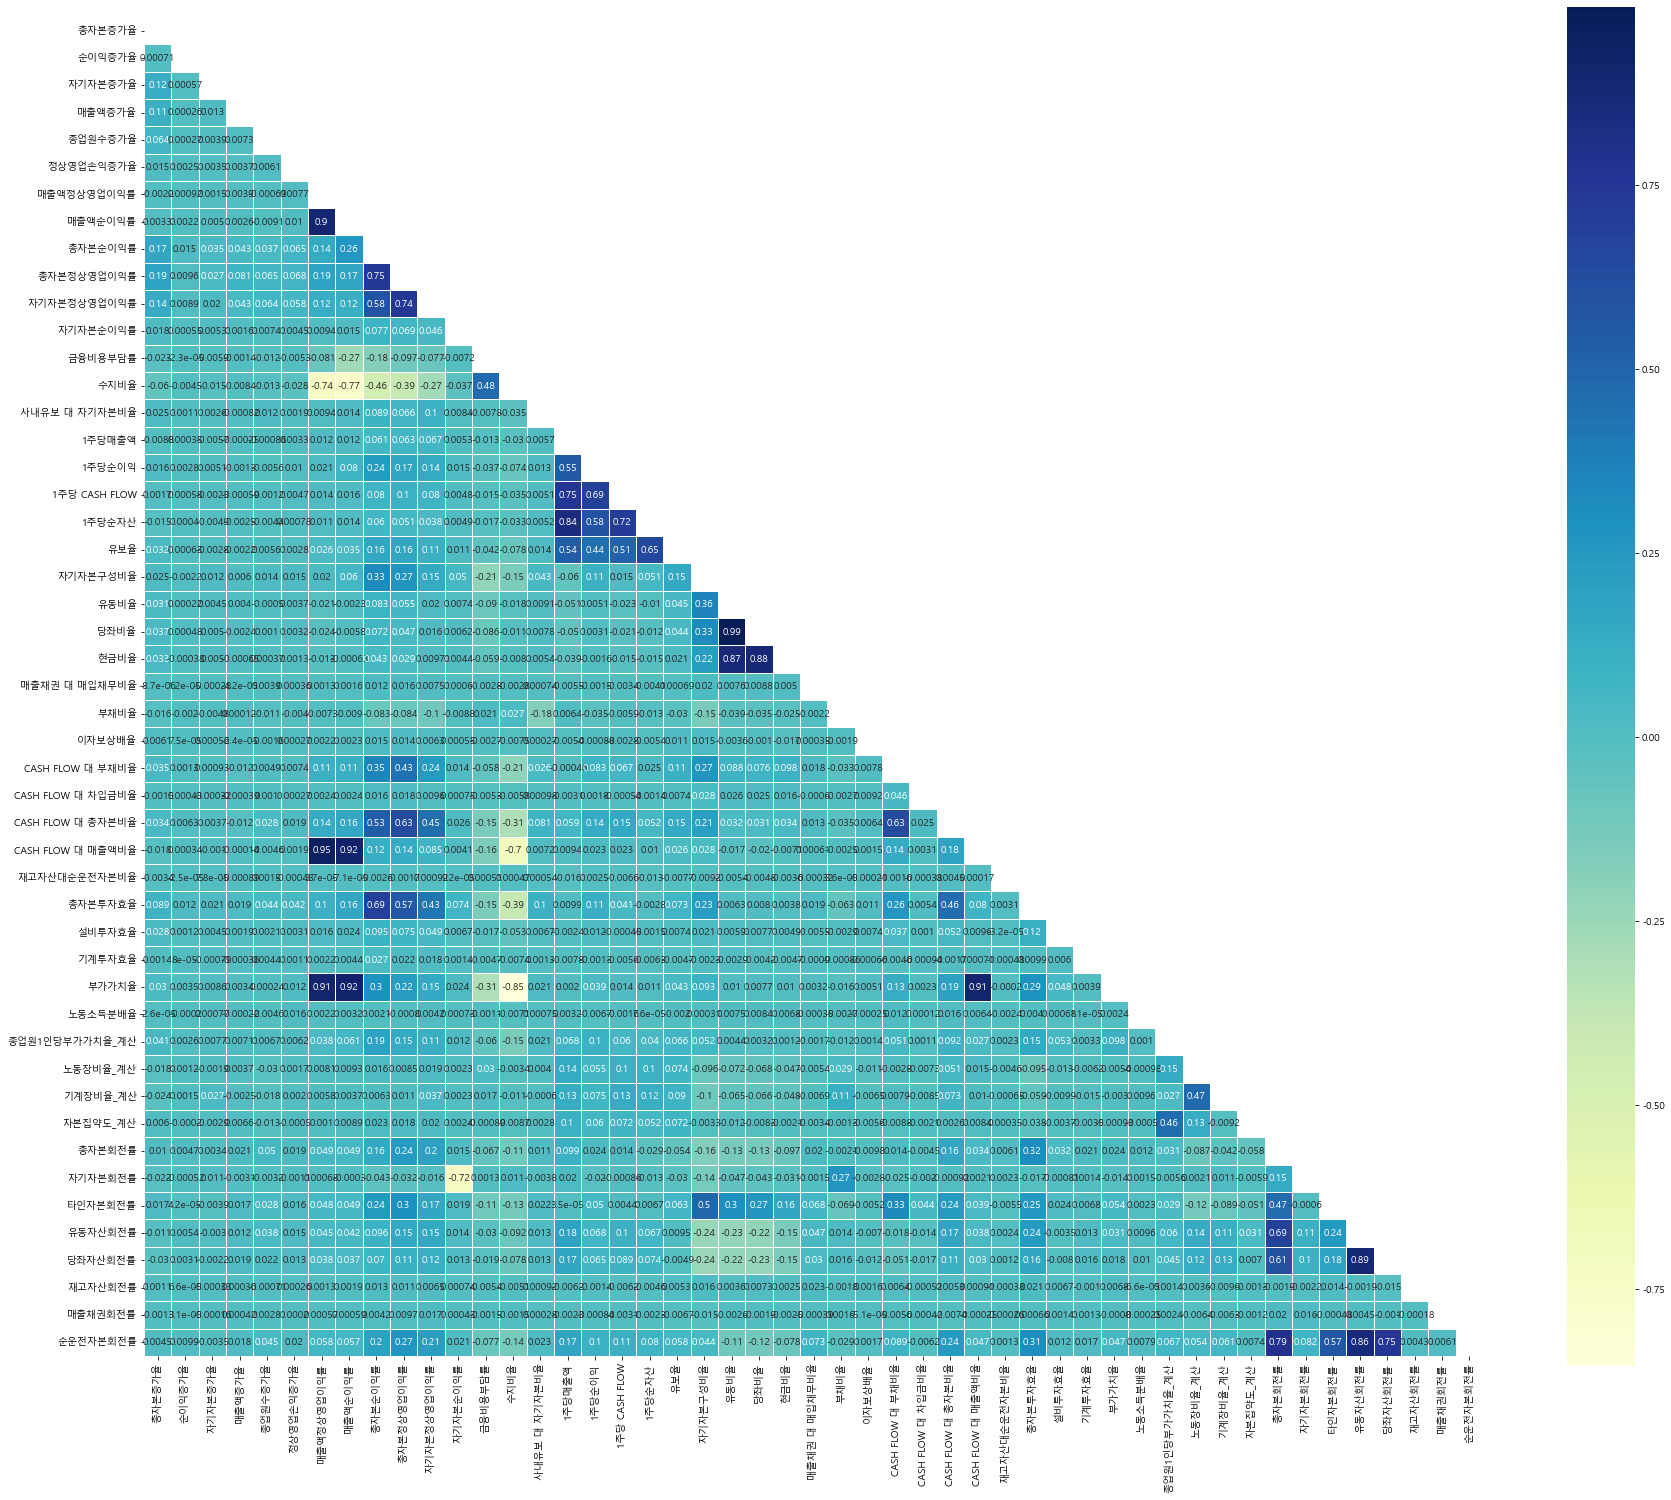

In [47]:
# 상관계수 히트맵

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

df_corr = df_part7.iloc[:, 10:].corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, annot=True, mask=mask, linewidths=.5, cmap="YlGnBu", square=True)

plt.show()

In [48]:
df_corr

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
총자본증가율,1.000000,0.000709,0.122770,0.105985,0.064170,0.014563,-0.002219,0.003267,0.166426,0.187369,0.137972,0.018009,-0.022922,-0.059611,0.024670,-0.008826,0.016471,0.001669,-0.014907,0.032057,0.024824,0.031275,0.036899,0.033419,-0.000009,-0.015987,0.006085,0.035019,-0.001533,0.034097,-0.017576,-0.003376,0.088521,0.027750,0.001351,0.030444,-0.000026,0.040879,-0.018163,-0.023663,0.005956,0.010086,-0.021964,0.017310,-0.010606,-0.030476,0.001063,-0.001335,0.004548
순이익증가율,0.000709,1.000000,0.000566,0.000255,0.000270,0.002467,0.000924,0.002248,0.014645,0.009587,0.008929,0.000553,-0.000023,-0.004532,0.001095,0.000350,0.002809,0.000577,0.000400,0.000632,-0.002151,0.000220,0.000479,-0.000376,0.000012,-0.001992,0.000075,0.001332,0.000432,0.006349,0.000341,-0.000025,0.011783,0.001204,0.000080,0.003535,-0.000200,0.002631,0.001204,0.001499,-0.000198,0.004662,-0.000518,0.000042,0.005395,0.003093,0.000066,0.000031,0.009949
자기자본증가율,0.122770,0.000566,1.000000,0.013184,0.003897,0.003518,0.001464,0.004970,0.035308,0.027452,0.020316,0.005287,-0.005891,-0.015271,0.002586,-0.005706,0.005060,-0.002256,-0.004853,-0.002823,0.012298,0.004476,0.005009,0.005047,-0.000276,-0.004782,0.000564,0.000933,-0.000322,0.003707,-0.001028,0.000078,0.021235,0.004546,-0.000791,0.008564,0.000774,0.007659,-0.001945,0.026950,-0.002897,0.003436,0.010606,-0.003945,-0.002951,-0.002242,-0.000333,-0.000165,-0.003519
매출액증가율,0.105985,0.000255,0.013184,1.000000,0.007267,0.003748,0.003853,0.002605,0.042557,0.081143,0.043383,0.001606,-0.001387,-0.008380,-0.000816,-0.000252,-0.001320,-0.000594,-0.002496,-0.002219,0.006020,0.004033,-0.002362,-0.000652,-0.000042,0.000119,-0.000024,-0.011922,-0.000385,-0.011901,-0.000145,-0.000888,0.019250,0.001891,-0.000357,0.003408,-0.000221,0.007074,0.003740,-0.002470,0.006554,0.021376,-0.003118,0.016587,0.012012,0.018556,0.000359,0.000423,0.018419
종업원수증가율,0.064170,0.000270,0.003897,0.007267,1.000000,0.006066,-0.000685,-0.009095,0.036642,0.065171,0.064381,0.007371,-0.011582,-0.013464,0.012252,-0.000863,-0.005641,-0.001201,-0.004398,0.005581,0.013882,-0.000503,0.000996,0.000369,0.003893,-0.010627,-0.001609,0.004857,0.001003,0.028209,-0.004585,0.001471,0.043560,0.002132,0.004425,0.000235,-0.004592,0.006673,-0.029623,-0.017725,-0.012741,0.050329,-0.003195,0.027656,0.037849,0.022001,-0.000707,0.002765,0.045070
정상영업손익증가율,0.014563,0.002467,0.003518,0.003748,0.006066,1.000000,0.007667,0.010428,0.065328,0.068381,0.057540,0.004454,-0.005334,-0.027850,0.001897,0.003328,0.010358,0.004741,0.000783,0.002793,0.014580,0.003719,0.003244,0.001263,0.000361,-0.004006,0.000272,0.007431,0.000271,0.018552,0.001935,-0.000477,0.041824,0.003107,0.001111,0.012037,0.016164,0.006218,0.001732,0.002028,-0.000502,0.019039,-0.001069,0.016393,0.015479,0.013368,0.000255,0.000197,0.020228
매출액정상영업이익률,-0.002219,0.000924,0.001464,0.003853,-0.000685,0.007667,1.000000,0.898299,0.144388,0.185906,0.119995,0.009393,-0.081129,-0.736923,0.009390,0.011678,0.020777,0.013538,0.011133,0.025823,0.020439,-0.020599,-0.024355,-0.013078,0.001328,-0.007308,0.002182,0.110093,0.002442,0.139239,0.953184,0.000037,0.104776,0.016087,0.002219,0.907962,0.002202,0.038404,0.008147,0.005794,0.000999,0.049360,0.000678,0.048147,0.045181,0.038296,0.001252,0.000571,0.058032
매출액순이익률,0.003267,0.002248,0.004970,0.002605,-0.009095,0.010428,0.898299,1.000000,0.260060,0.172023,0.115773,0.014618,-0.268675,-0.767697,0.013802,0.012483,0.080079,0.015581,0.013531,0.034641,0.059727,-0.002344,-0.005757,-0.000628,0.001594,-0.008970,0.002295,0.113478,0.002425,0.162390,0.919531,-0.000071,0.15

## 통합데이터 피처셀렉션

## 경기국면별 피처셀렉션

### Lasso

In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import time
import warnings
warnings.simplefilter('ignore')

In [67]:
lasso_time = time.time()
lasso_low = Lasso(alpha=3).fit(X_train, y_train)
print('Lasso 수행 시간: {0:.1f} 초'.format(time.time()-lasso_time))
print("사용한 인자의 수 : {}".format(np.sum(lasso_low.coef_ != 0)))

Lasso 수행 시간: 17.1 초
사용한 인자의 수 : 974


In [68]:
X_train.iloc[:,lasso_low.coef_!=0].columns.nunique()	

49

In [ ]:
def fs_lasso(alphas):
    for alpha in alphas:
        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# 하이퍼파라미터 설정
alpha_value = 0.1
lasso = Lasso(alpha=alpha_value).fit(data) 
Y_pred_train = lasso.predict(X_train) 
Y_pred = lasso.predict(X_test)

# 시각화
plt.scatter(y_train, Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = 45°(실제값 = 예측값))
plt.xlabel(실제 Price: $Y_i$)
plt.ylabel(예측 Price : $\hat{Y}_i$)
plt.legend()
plt.title(예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$),  + falpha={alpha_value})
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error( y_train,Y_pred_train) : .4f}')
plt.show()

### SelectKBest(Filter method)
#### 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식. 피처 선택 후 따로 모델 적용이 필요가 없다. 카이제곱, information gain

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

skb = SelectKBest(score_func=f_regression, k=15)

X_train_selected = skb.fit_transform(X_train, y_train)
X_test_selected = skb.fit_transform(X_test)

X_train_selected.shape, X_test_selected.shape


### 선택된 피처 확인 

In [ ]:
feature_names = X_train.columns

# 선택된 feature mask처리
selected_mask = skb.get_support()

selected_features = feature_names[selected_mask]
unselected_features = feature_names[~selected_mask]

print('Selected features: ', selected_features)
print('Unselected features: ', unselected_features)


In [ ]:
# 선택된 피처들의 score 확인
skb_score = pd.DataFrame(skb.scores_,
                        skb.feature_names_in_)\
                        .sort_values(col, sascending=False)
                        
skb_score

In [ ]:
# 적절한 K값 찾기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')   # 몇 개 feature 
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    
    all_col = X_train.columns
	selected_names = all_col[selector.get_support()]
    print('Selected names: ', selected_names)    # select 된 feature name

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')


# 시각화를 통해 mae 차이의 변화를 보고 적절한 k를 선택할 수 있음.
plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel(MAE ($))
plt.xlabel(Number of Features)
plt.title('Validation Curve')
plt.legend()
plt.show()

### SelectFromModel(Embedded method)
#### supervised 머신러닝 모델을 사용해서 피처 중요도를 평가 후 중요도가 높은 피처들만 선택하는 방식. 한번에 모든 피처들을 고려하기 때문에 상호작용 부분을 반영할 수 있다. LogisticRegression, DecisionTree, RandomForestClassifier, LGBMClassifier와 같은 모델에 적용이 필요하다.

### LogisticRegression

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_lg = SelectFromModel(estimator=LogisticRegression(C=0.01, penalty='l2'), max_features=20).fit(X_train, y_train)
print(sfm_lg.estimator_.coef_)
print('임계값: ', sfm_lg.threshold_)

### RandomForestClassifier

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold='median')
sfm_rf.fit(X_train, y_train)
sfm_rf_scores = pd.DataFrame()

sfm_rf_scores['Feature'] = X_train.columns
sfm_rf_scores['Support'] = sfm_rf.get_support()
# sfm_rf_scores[sfm_rf_scores['Support']== True]
sfm_rf_scores

### RFE(Recursive Feature Elimination, Wrapper method) 
#### 원하는 개수의 변수들이 남을 때까지 학습을 반복하며 유의미하지 않은 변수들을 제거해나가는 Backward 방식. AIC 값. 전진선택법, 스텝와이즈

## 데이터 수동 분리

In [ ]:
X_train = data[:]
X_test = data[:]
y_train = data[:]
y_test = data[:]

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

## 데이터셋 구분

### 수축기, 확장기, 혼재

In [ ]:
import pandas as pd

df_part6 = pd.read_csv('data/전처리/전처리part6.csv', encoding='CP949')

In [6]:
contraction_df = [201212, 201812, 201912]
expansion_df = [201412, 201512, 201612]
expansion_df = [20112, 201312, 201712, 202012]

## ver.1
#### 9개월(3분기) 이상 지속된 국면을 해당 국면으로 설정 후 & 그 외 혼재된 연도 삭제

In [26]:
# ver1 경기순환국면 확장기, 수축기
# 2011년과 2020년은 9개월(3분기) 이상 지속된 국면이 없기 때문에 제외
v1_tenth_contraction = [201212]
v1_eleventh_expansion = [201312, 201412, 201512, 201612, 201712]
v1_eleventh_contraction = [201812, 201912]

In [22]:
v1_tc_df = df[df['회계년도'].isin(v1_tenth_contraction)].reset_index(drop=True)
v1_tc_df

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,(주)CMG제약,58820,201212,200108,NaN,0.0,0,0,제조업,1,109.147119,-341.571868,75.170505,-8.429134,-0.74,-756.819406,-25.87,-40.97,-15.78,-9.96,-16.95,-26.84,2.53,140.55,-165.71,246.198501,-100.872314,-23.817768,478.648111,-4.31,55.317408,693.49,649.98,68.81,323.41,80.77,-7.75,-8.10,-11.83,-3.62,-12.71,7.330001,0.47,2.89,10.67,1.66,1749.845902,-0.657015,69.134328,18.562172,425.291045,0.39,0.655130,0.93,0.52,0.57,5.71,1.85,0.42
1,(주)DB하이텍,990,201212,197512,NaN,1.0,0,1,제조업,1,-3.443480,68.001622,-5.573024,6.984627,-10.25,63.797288,-2.64,-5.31,-2.66,-1.33,-5.22,-10.47,7.81,106.34,-210.36,13272.770134,-704.122586,1659.732242,6168.182470,66.82,25.125638,55.66,41.39,7.19,384.99,298.00,-0.31,7.77,9.87,5.81,11.39,-32.182658,21.22,37.03,112.22,41.58,55.925427,104.948086,297.283420,184.176649,498.727865,0.50,1.972724,0.67,2.01,2.73,7.56,8.08,0.61
2,(주)ES큐브,50120,201212,200204,NaN,0.0,0,0,도매 및 소매업,1,-16.575097,92.510776,1.564118,4.854248,-0.42,4185.927443,0.16,-0.64,-0.78,0.19,0.22,0.29,-0.65,100.19,1.22,2392.628947,-15.355601,223.345604,1704.814715,235.11,86.124139,472.77,371.91,84.78,297.97,16.11,1.72,81.36,3402.53,11.29,9.33,27.056542,38.87,565.49,2009.57,32.14,71.071590,49.225975,5.915254,0.002085,189.305085,1.21,1.415101,8.72,2.46,3.13,11.55,12.19,2.03
3,(주)HJ중공업,97230,201212,200708,NaN,1.0,0,1,건설업,1,-6.417615,45.094924,-8.106284,-11.834000,-5.42,-50.993758,2.08,-2.09,-0.78,0.78,2.95,-2.95,6.86,100.50,45.51,52793.539824,-1102.002310,-1747.643045,38591.597393,610.26,26.051508,92.89,83.75,29.88,96.91,283.85,0.27,-4.99,-6.56,-3.69,-9.54,-128.542383,8.26,19.11,156.53,21.33,39.223917,185.285877,510.082005,26.445710,2254.406986,0.37,1.423261,0.51,1.09,1.25,8.72,9.73,0.53
4,(주)MH에탄올,23150,201212,199612,NaN,0.0,0,0,제조업,1,0.133348,1616.277678,-7.005544,33.455315,1.96,803.714994,9.12,0.48,0.21,4.06,13.24,1.01,7.51,98.31,85.99,8538.310714,41.052714,-700.886000,8387.571429,787.71,29.525631,61.27,36.07,0.73,66557.71,238.69,1.08,-2.50,-3.09,-1.76,-3.95,-65.053757,11.43,21.39,728.46,25.71,37.656075,220.690962,661.980769,14.564154,2676.942308,0.45,1.451642,0.64,1.25,1.83,3.94,6.33,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,환인제약(주),16580,201212,199607,NaN,0.0,0,0,제조업,1,9.221950,8.106212,8.458124,-2.571922,-2.68,-8.957870,17.06,14.73,9.09,10.53,11.71,10.11,-2.10,82.03,10.57,5764.580348,849.274384,1135.007771,8738.139158,1675.24,89.583464,976.02,868.84,377.30,1047.05,11.63,1097.49,95.84,0.00,9.98,16.89,-107.186115,24.96,118.93,1781.26,42.24,56.979446,113.499223,95.433584,6.371855,454.706767,0.62,0.545681,6.10,0.85,0.96,8.02,2.26,0.78
1521,효성아이티엑스(주),94280,201212,200710,NaN,0.0,0,0,임대업,1,16.140530,-23.268443,29.223892,7.811043,3.85,12.635411,2.67,2.08,6.18,7.94,20.42,15.90,0.20,97.31,16.68,17165.067348,356.532427,752.216527,2243.723849,348.36,38.864379,70.80,61.62,0.33,1357.19,157.31,7.95,21.33,65.04,13.04,4.38,-31.463047,182.84,1427.29,2520.33,61.44,91.680833,22.171384,1.553713,0.882666,12.131281,2.98,0.601353,4.87,7.96,9.15,61.34,9.84,3.30
1522,휴림로봇(주),90710,201212,200612,NaN,0.0,0,0,제조업,1,-8.497649,-487.319530,-2.550872,-38.143013,-4.97,-323.394848,-13.80,-16.49,-9.99,-8.35,-17.68,-21.13,2.17,116.15,0.06,3555.393909,-586.456844,-90.899669,2867.770257,450.40,48.801256,149.90,109.42,15.23,234.82,104.91,-5.18,-9.43,-14.44,-4.83,-7.62,81.119959,9.47,47.96,1586.47,14.9

In [29]:
v1_ee_df = df[df['회계년도'].isin(v1_eleventh_expansion)].reset_index(drop=True)
v1_ee_df

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,(주)CMG제약,58820,201312,200108,NaN,0.0,0,0,제조업,1,-2.093352,2348.675303,55.100407,25.510008,1.49,631.501169,3.88,1.45,0.52,1.40,1.96,0.74,1.65,98.55,-106.33,235.517466,3.419043,-45.471032,566.198482,13.12,87.631971,694.71,610.74,394.63,282.72,14.11,0.700000,-39.85,-194.73,-4.93,-13.51,14.120364,12.51,77.91,2.894000e+02,34.29,71.284323,51.118235,79.448529,17.604882,411.485294,0.36,0.506332,1.26,0.48,0.52,5.39,2.07,0.42
1,(주)CMG제약,58820,201412,200108,NaN,0.0,0,0,제조업,1,3.855597,-46.641074,0.010946,11.520576,20.59,-44.098325,1.94,0.69,0.28,0.78,0.90,0.32,-0.65,99.32,-106.65,262.650435,1.824365,8.367993,566.417813,13.13,84.387905,324.58,268.23,101.24,285.31,18.50,3.600000,-17.73,-104.12,-2.77,-7.06,25.090228,12.16,37.80,1.320600e+02,31.04,76.809811,43.079512,114.841463,30.445768,354.432927,0.40,0.464339,2.85,0.68,0.80,4.77,1.86,0.56
2,(주)CMG제약,58820,201512,200108,NaN,0.0,0,0,제조업,1,-2.644307,-2409.614083,-4.480893,18.851969,-4.88,-681.514824,-9.51,-13.50,-6.37,-4.49,-5.37,-7.62,-0.11,113.24,-120.22,306.259774,-41.338674,27.296492,530.854621,6.02,82.795953,296.85,235.21,29.00,254.69,20.78,-32.220000,16.12,24988.82,2.77,5.80,31.315211,7.63,24.21,9.092000e+01,15.96,134.474407,27.671795,114.243590,28.007199,362.769231,0.47,0.564493,2.88,0.99,1.22,5.22,2.10,0.75
3,(주)CMG제약,58820,201612,200108,NaN,0.0,0,0,제조업,1,96.310506,311.244954,116.010163,21.921286,2.56,248.615545,5.25,5.24,2.06,2.07,2.34,2.34,-0.47,95.06,-53.95,303.290046,15.894939,30.553180,930.094410,86.02,91.104484,862.15,792.17,23.52,219.41,9.76,50.085714,29.03,0.00,2.58,8.69,9.181755,9.48,62.31,2.736000e+02,31.90,63.253900,65.742875,105.662500,22.047438,693.625000,0.39,0.445796,3.36,0.63,0.71,5.56,2.66,0.54
4,(주)CMG제약,58820,201712,200108,NaN,0.0,0,0,제조업,1,-1.272045,64.066740,-3.128959,25.980614,25.00,-9.946307,3.75,6.83,2.57,1.41,1.57,2.85,-2.72,93.31,-3.47,381.455040,26.035198,17.890856,899.499302,79.90,89.390956,746.28,673.66,34.90,215.55,11.87,50.085714,22.67,0.00,2.40,6.34,11.237105,12.51,84.87,3.890800e+02,33.01,67.979294,68.550050,80.915000,16.226510,547.840000,0.38,0.417335,3.86,0.52,0.57,5.81,3.01,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,흥아해운(주),3280,201312,197606,NaN,0.0,0,0,운수 및 창고업,0,7.026008,17.748954,24.611435,5.977506,-3.78,-41.383093,2.51,2.36,3.29,3.50,13.80,12.97,1.84,95.90,18.35,9088.600308,214.300424,317.421334,1664.376003,273.07,27.203257,71.73,65.91,12.19,64.64,267.60,1.150000,6.48,10.54,4.71,3.50,-20.576399,14.13,36.63,5.737466e+06,10.48,37.002209,103.399418,318.938865,0.000000,795.036390,1.39,6.042220,1.87,5.18,5.70,56.65,27.46,2.02
8181,흥아해운(주),3280,201412,197606,NaN,0.0,0,0,운수 및 창고업,0,13.690307,1.063296,7.760601,7.171915,9.90,-3.906495,2.25,2.22,3.01,3.04,11.51,11.37,1.66,97.18,16.84,9740.426978,216.579071,5.153858,1817.138085,301.53,25.784426,65.25,59.64,8.09,66.36,287.83,1.120000,2.84,5.73,2.10,1.66,-16.142234,13.89,27.88,1.218393e+07,10.93,48.001879,102.744066,423.879470,0.000000,831.529801,1.35,6.107006,1.84,4.98,5.44,59.77,26.03,2.03
8182,흥아해운(주),3280,201512,197606,NaN,0.0,0,0,운수 및 창고업,0,21.933460,-42.676587,3.389326,2.420227,7.68,14.408829,2.51,1.24,1.46,2.95,12.48,6.18,2.22,98.11,11.64,9976.167403,124.150515,400.330868,1910.263815,314.93,21.863026,51.92,47.54,7.76,60.44,357.39,1.020000,2.78,6.61,2.17,2.03,-9.102981,13.11,21.49,3.459744e+09,12.28,50.6479

In [30]:
v1_ec_df = df[df['회계년도'].isin(v1_eleventh_contraction)].reset_index(drop=True)
v1_ec_df

,회사명,거래소코드,회계년도,상장일,상장폐지일,부실기업1,부실기업2,부실기업,업종,경기민감도,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,정상영업손익증가율,매출액정상영업이익률,매출액순이익률,총자본순이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률,금융비용부담률,수지비율,사내유보 대 자기자본비율,1주당매출액,1주당순이익,1주당 CASH FLOW,1주당순자산,유보율,자기자본구성비율,유동비율,당좌비율,현금비율,매출채권 대 매입채무비율,부채비율,이자보상배율,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,재고자산대순운전자본비율,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,종업원1인당부가가치율_계산,노동장비율_계산,기계장비율_계산,자본집약도_계산,총자본회전률,자기자본회전률,타인자본회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,순운전자본회전률
0,(주)CMG제약,58820,201812,200108,NaN,0.0,0,0,제조업,1,4.391538,113.941369,6.164569,20.053151,11.00,64.750960,5.15,12.16,5.42,2.29,2.54,6.01,-1.01,92.86,2.22,457.948793,55.700060,8.144012,954.951160,90.99,90.909211,957.86,856.94,158.50,414.65,10.00,50.085714,13.63,0.00,1.24,2.84,11.763349,14.73,106.25,4.789100e+02,33.79,67.326482,75.890315,77.788288,14.952423,515.225225,0.45,0.493892,4.53,0.61,0.68,6.05,3.08,0.55
1,(주)CMG제약,58820,201912,200108,NaN,0.0,0,0,제조업,1,68.074285,-49.692268,73.259362,17.563295,8.56,1.400176,4.44,5.20,1.99,1.70,1.83,2.15,-1.86,93.70,2.81,422.073107,21.967944,20.327895,1297.106266,159.42,93.713752,1618.07,1520.84,199.55,468.79,6.71,303.000000,15.35,647.74,0.96,3.16,6.405069,9.90,114.60,4.380500e+02,32.47,72.168603,78.976141,100.078838,14.314320,797.688797,0.38,0.412632,5.21,0.51,0.55,6.65,3.12,0.47
2,(주)DB하이텍,990,201812,197512,NaN,0.0,0,0,제조업,1,7.302487,-21.190199,22.508567,-1.538624,0.77,-21.091511,16.88,12.97,8.43,10.97,22.28,17.12,1.93,82.21,49.52,15036.207341,1950.718749,4051.646950,12189.233322,160.40,52.355726,244.51,217.15,75.96,271.06,91.00,6.770000,35.76,59.59,17.04,27.15,18.929816,28.98,61.13,1.409500e+02,46.18,42.924542,161.915069,305.659335,211.471878,537.440409,0.65,1.319831,1.28,1.82,2.16,11.35,7.25,1.29
3,(주)DB하이텍,990,201912,197512,NaN,0.0,0,0,제조업,1,2.096133,20.509613,15.447799,20.639712,1.23,60.445301,22.45,12.96,9.71,16.82,30.14,17.40,1.25,78.55,57.62,18139.637251,2350.803608,3618.830102,14497.597872,199.00,59.202568,194.01,170.41,38.58,332.91,68.91,13.440000,38.43,67.56,15.68,21.14,25.097253,34.83,67.30,1.352100e+02,46.97,38.213930,199.449030,311.552804,239.232311,550.480546,0.75,1.342291,1.70,1.99,2.26,17.05,8.04,1.36
4,(주)ES큐브,50120,201812,200204,NaN,0.0,0,0,도매 및 소매업,1,6.174930,-452.228203,-2.840376,-5.545508,-14.29,-153.863386,-3.59,-18.13,-5.61,-1.11,-1.69,-5.54,2.29,115.62,28.80,405.601505,-73.537211,-16.187921,799.093700,68.98,62.926304,119.80,95.25,71.07,356.25,58.92,-0.820000,1.16,1.34,0.43,1.43,124.010987,1.04,7.67,2.787100e+02,3.45,340.543111,5.900333,362.700000,0.000000,3616.066667,0.31,0.470357,0.90,0.70,0.86,3.84,11.85,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,휴젤(주),145020,201912,201512,NaN,0.0,0,0,제조업,1,-2.567495,-33.544539,-5.162220,12.158463,20.85,13.110288,33.28,24.58,5.55,7.51,8.91,6.25,0.37,68.40,100.90,47356.192987,11639.136157,17823.875836,148140.002986,33932.28,83.187576,1705.99,1629.03,40.71,657.68,20.21,19.090000,47.46,78.03,7.98,34.90,4.791677,12.65,171.23,4.445900e+02,55.32,28.985644,190.554965,131.659674,41.244406,1976.750583,0.23,0.367160,1.44,0.31,0.32,8.06,4.41,0.30
3667,흥구석유(주),24060,201812,199412,NaN,0.0,0,0,도매 및 소매업,1,-5.889568,14.777489,0.986153,6.874950,-9.68,45.369913,0.66,1.43,3.06,1.41,1.56,3.38,-0.01,98.21,45.83,11080.553533,157.985933,336.199133,4696.133333,4641.63,93.666279,329.17,290.09,105.67,139592.04,6.76,12.660000,69.29,0.00,4.39,1.99,-39.085821,9.80,19.56,3.064100e+03,4.44,47.471157,87.780000,448.809524,2.864786,895.309524,2.14,2.093682,22.28,11.71,13.76,78.35,31.01,8.08
3668,흥구석유(주),24060,201912,199412,NaN,0.0,0,0,도매 및 소매업,1,11.243737,249.941113,9.311157,-9.349453,-5.95,-54.160884,0.33,5.50,10.44,0.63,0.68,11.25,-0.12,93.28,50.44,10044.582333,552.857733,48.724867,5133.400000,5078.89,92.039062,485.39,422.76,49.75,53375.77,8.65,252.020000,43.35,0.00,3.4

## ver.2
#### 6개월 이상 확장수축이 지속된 국면을 해당 국면으로 설정

In [31]:
# ver2 경기순환국면 확장기, 수축기
v2_tenth_expansion = [201112]
v2_tenth_contraction = [201212]
v2_eleventh_expansion = [201312, 201412, 201512, 201612, 201712]
v2_eleventh_contraction = [201812, 201912]
v2_twelveth_expansion = [202012]

In [34]:
v2_te_df = df[df['회계년도'].isin(v2_tenth_expansion)].reset_index(drop=True)
# v2_te_df

In [35]:
v2_tc_df = df[df['회계년도'].isin(v2_tenth_contraction)].reset_index(drop=True)

In [37]:
v2_ee_df = df[df['회계년도'].isin(v2_eleventh_expansion)].reset_index(drop=True)

In [50]:
v2_ec_df = df[df['회계년도'].isin(v2_eleventh_contraction)].reset_index(drop=True)

In [40]:
v2_twe_df = df[df['회계년도'].isin(v2_twelveth_expansion)].reset_index(drop=True)

## ver.3
#### 해당 년도 12월이 속한 국면을 그 해의 국면으로 설정

In [41]:
# ver3 경기순환국면 확장기, 수축기
v3_tenth_contraction = [201112, 201212]
v3_eleventh_expansion = [201312, 201412, 201512, 201612]
v3_eleventh_contraction = [201712, 201812, 201912]
v3_twelveth_expansion = [202012]

In [45]:
v3_tc_df = df[df['회계년도'].isin(v3_tenth_contraction)].reset_index(drop=True)

In [46]:
v3_ee_df = df[df['회계년도'].isin(v3_eleventh_expansion)].reset_index(drop=True)

In [49]:
v3_ec_df = df[df['회계년도'].isin(v2_eleventh_contraction)].reset_index(drop=True)

In [48]:
v3_twe_df = df[df['회계년도'].isin(v3_twelveth_expansion)].reset_index(drop=True)